In [1]:
!pip install tensorflow pandas numpy scikit-learn matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [3]:
df = pd.read_csv("/content/Emotion_classify_Data.csv")
print(df.head())
print(df['Emotion'].value_counts())


                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear
Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64


In [5]:
texts = df['Comment'].astype(str).values
labels = df['Emotion'].values

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

In [6]:
max_words = 10000   # Vocabulary size
max_len = 100       # Maximum sentence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

X_train, X_test, y_train, y_test = train_test_split(
    padded, labels_categorical, test_size=0.2, random_state=42
)


In [7]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=7,
    batch_size=64,
    verbose=1
)


Epoch 1/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - accuracy: 0.3376 - loss: 1.0993 - val_accuracy: 0.3263 - val_loss: 1.1021
Epoch 2/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 340ms/step - accuracy: 0.3470 - loss: 1.0995 - val_accuracy: 0.3263 - val_loss: 1.1004
Epoch 3/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 322ms/step - accuracy: 0.3370 - loss: 1.0988 - val_accuracy: 0.3263 - val_loss: 1.1001
Epoch 4/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 360ms/step - accuracy: 0.3511 - loss: 1.0984 - val_accuracy: 0.3368 - val_loss: 1.1002
Epoch 5/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 38s 307ms/step - accuracy: 0.3525 - loss: 1.0978 - val_accuracy: 0.3368 - val_loss: 1.0992
Epoch 6/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 333ms/step - accuracy: 0.3560 - loss: 1.0980 - val_accuracy: 0.3263 - val_loss: 1.0997
Epoch 7/7
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 312ms/step - accuracy: 0.3533 - loss: 1.0981 - val_accuracy: 0.3368 - val_loss: 1.0987


In [9]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.3f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3257 - loss: 1.0992
Test Accuracy: 0.320


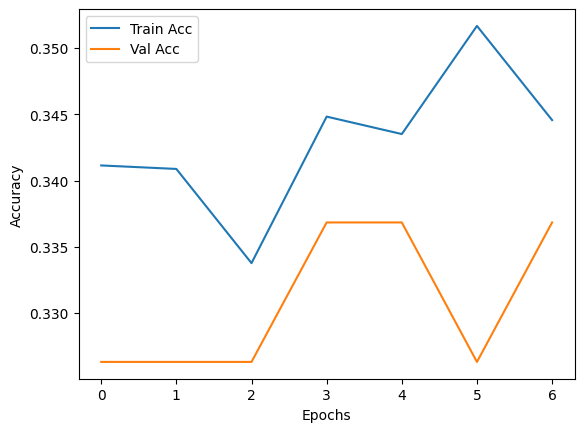

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
sample_text = ["I am so excited for the concert tonight!"]
seq = tokenizer.texts_to_sequences(sample_text)
pad = pad_sequences(seq, maxlen=max_len, padding='post')
pred = model.predict(pad)
print("Predicted emotion:", le.inverse_transform([np.argmax(pred)]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
Predicted emotion: ['joy']
